<a href="https://colab.research.google.com/github/ZavalaCatalina/InteligenciaComputacional/blob/main/Exportar_un_modelo_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto: Predicción de Riesgo de Diabetes

Para esa actividad, se utiizó el dataset Diabeter health indicator de Kaggle.
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

Este proyecto utiliza el dataset Diabetes Health Indicators para predecir si una persona tiene riesgo de padecer diabetes basándose en indicadores de salud y estilo de vida.

##Librerias y carga de dataset

Se utiliza el conjunto de datos Diabetes Health Indicators (50/50 split), el cual proporciona un balance equitativo entre casos positivos y negativos para garantizar un entrenamiento robusto.





In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset (Diabetes Health Indicators)
df = pd.read_csv('/content/drive/MyDrive/Inteligencia Computacional/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')




#EDA

En esta sección se analizan las correlaciones entre los hábitos de vida y la incidencia de la enfermedad.

Distribución de Clases: Se verifica que el dataset esté balanceado para evitar sesgos.

Correlación: Se identifican variables críticas como la Presión Arterial (HighBP) y el Índice de Masa Corporal (BMI) como los predictores más influyentes.

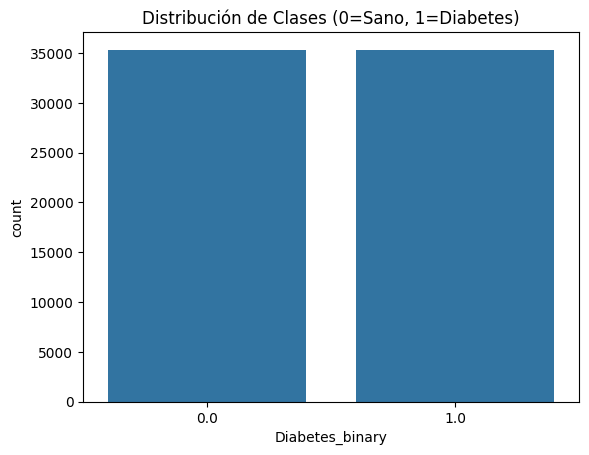

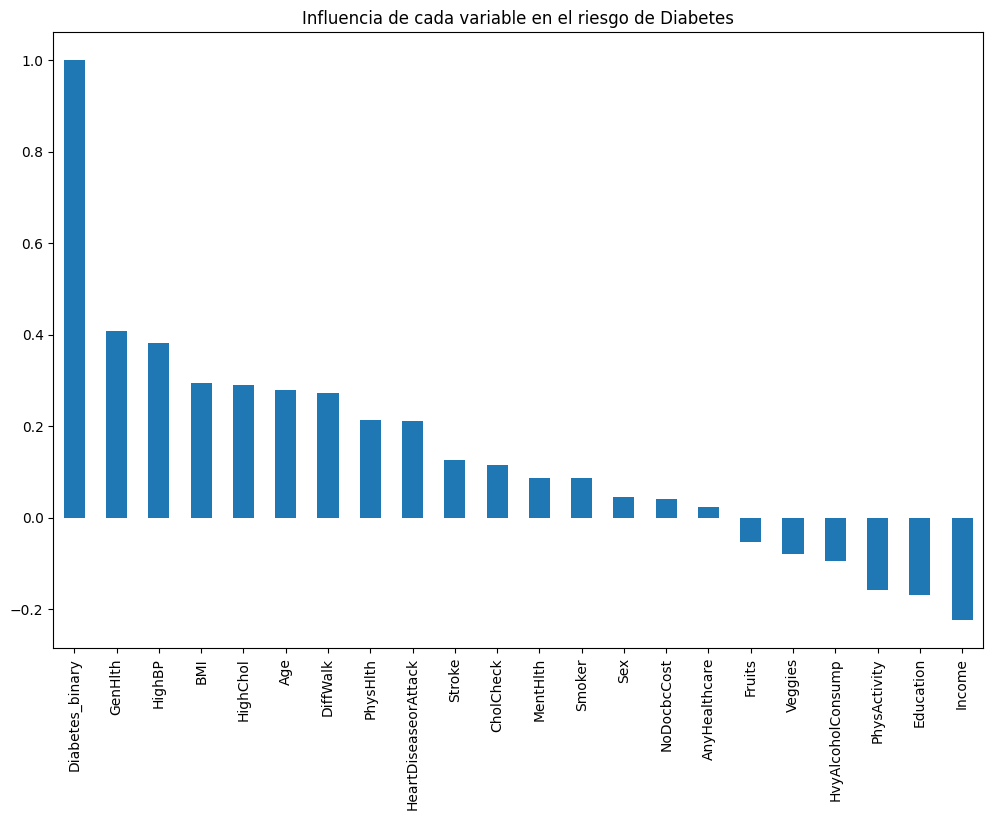

In [2]:
# Ver balance de clases
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribución de Clases (0=Sano, 1=Diabetes)')
plt.show()

# Correlación de variables clave con la Diabetes
plt.figure(figsize=(12,8))
df.corr()['Diabetes_binary'].sort_values(ascending=False).plot(kind='bar')
plt.title('Influencia de cada variable en el riesgo de Diabetes')
plt.show()

#Pipeline y Entrenamiento

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Seleccionamos las variables más importantes
features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'HvyAlcoholConsump', 'GenHlth', 'Age']
X = df[features]
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline de preprocesamiento y modelo
pipeline_diabetes = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42))
])

# Entrenamiento
pipeline_diabetes.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, random_state=42))])

#Evaluación

En esta etapa se cuantifica el desempeño del algoritmo utilizando datos que no fueron vistos durante el entrenamiento. Se utiliza el Accuracy para medir el porcentaje de aciertos totales y el Reporte de Clasificación para evaluar cómo se comporta el modelo identificando específicamente los casos de diabetes (sensibilidad) y los casos sanos (especificidad).

Exactitud del modelo (Accuracy): 74.51%
------------------------------
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7090
         1.0       0.73      0.79      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139



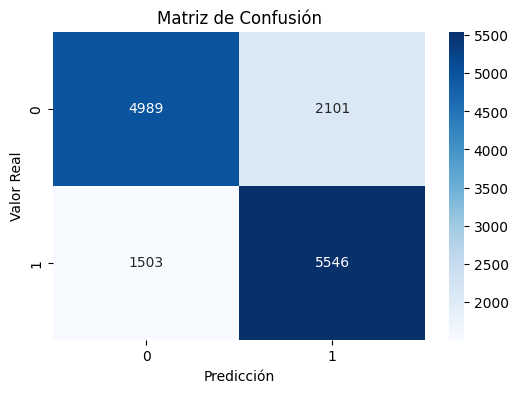

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones con el conjunto de prueba
y_pred = pipeline_diabetes.predict(X_test)

#Calcular el Accuracy (Exactitud)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo (Accuracy): {accuracy:.2%}")
print("-" * 30)

# Reporte de Clasificación (Precision, Recall, F1-score)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión (Opcional, pero suma puntos visuales)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Exportación del modelo

In [5]:
import joblib
from google.colab import drive

# ruta
ruta_drive = '/content/drive/MyDrive/Inteligencia Computacional/modelo_diabetes_final.pkl'

# Guardar el Pipeline completo
joblib.dump(pipeline_diabetes, ruta_drive)

print(f"Modelo guardado físicamente en tu Drive: {ruta_drive}")

Modelo guardado físicamente en tu Drive: /content/drive/MyDrive/Inteligencia Computacional/modelo_diabetes_final.pkl
